## Data Combine

- To build the metadata of movie, we combine all the dataset we scrapped and made from various sources

In [135]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore') 

### 1. Combine data of scrapped from imdb

In [3]:
# Main dataset

imdb_data  = pd.read_csv("Fin_dataset/imdb_combined_data.csv", encoding='utf-8')
imdb_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,rating_2019,rating_2021,num_votes_2019,num_votes_2021
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,6.1,6.1,589.0,698.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,NaN,5.7,NaN,132.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,5.8,5.9,188.0,214.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,5.2,5.1,446.0,520.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,7.0,7.0,2237.0,2675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,6.4,7.6,194.0,218.0
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,6.7,6.8,102.0,134.0
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,NaN,3.5,NaN,225.0
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,NaN,5.8,NaN,1192.0


In [4]:
crew_name = pd.read_csv('Fin_dataset/selected_crew_name.csv')
crew_name

,imdb_title_id,directors_1,director_1_name,directors_2,director_2_name,star_1,star_1_name,star_2,star_2_name,star_3,star_3_name,star_4,star_4_name
0,tt0000574,nm0846879,Charles Tait,NaN,NaN,nm0846887,Elizabeth Tait,nm0846894,John Tait,nm3002376,Norman Campbell,nm0170118,Bella Cola
1,tt0001258,nm0088881,August Blom,NaN,NaN,nm2528881,Aage Lorentzen,nm1993094,Ellen Diedrich,nm1458507,Victor Fabian,nm2112876,Julie Henriksen
2,tt0001892,nm0300487,Urban Gad,NaN,NaN,nm2325688,Mary Hagen,nm0003425,Asta Nielsen,nm0699637,Valdemar Psilander,nm0375839,Gunnar Helsengreen
3,tt0002101,nm0309130,Charles L. Gaskill,NaN,NaN,nm0906610,James R. Waite,nm0306947,Helen Gardner,nm0801774,Pearl Sindelar,nm0276160,Miss Fielding
4,tt0002130,nm0655824,Adolfo Padovan,nm0078205,Francesco Bertolini,nm0660139,Salvatore Papa,nm0685283,Arturo Pirovano,nm0209738,Giuseppe de Liguoro,nm3942815,Pier Delle Vigne
...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,nm1832009,Ahmet Faik Akinci,NaN,NaN,nm1832009,Ahmet Faik Akinci,nm7659571,Belma Mamati,nm2456249,Metin Keçeci,nm10569025,Burhan Sirmabiyik
117842,tt9914942,nm1716653,Laura Jou,NaN,NaN,nm10814833,Maria Morera Colomer,nm10823679,Biel Rossell Pelfort,nm1290838,Isaac Alcayde,nm5580678,Lluís Altés
117843,tt9916190,nm7308376,Fraser Precious,NaN,NaN,nm0302466,Patrick Gallagher,nm8383131,Lee Byford,nm2018573,Sean Cronin,nm7477011,Andrei Nova
117844,tt9916270,nm1480867,Giacomo Cimini,NaN,NaN,nm0144812,Sergio Castellitto,nm3080119,Lorenzo Richelmy,nm2063290,Anna Foglietta,nm9428255,Marina Occhionero


In [5]:
# Combine main data and crewname data

imdb_data_crew = pd.merge(imdb_data, crew_name, on='imdb_title_id', how='left')
imdb_data_crew

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,...,directors_2,director_2_name,star_1,star_1_name,star_2,star_2_name,star_3,star_3_name,star_4,star_4_name
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,...,NaN,NaN,nm0846887,Elizabeth Tait,nm0846894,John Tait,nm3002376,Norman Campbell,nm0170118,Bella Cola
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,...,NaN,NaN,nm2528881,Aage Lorentzen,nm1993094,Ellen Diedrich,nm1458507,Victor Fabian,nm2112876,Julie Henriksen
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,...,NaN,NaN,nm2325688,Mary Hagen,nm0003425,Asta Nielsen,nm0699637,Valdemar Psilander,nm0375839,Gunnar Helsengreen
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,...,NaN,NaN,nm0906610,James R. Waite,nm0306947,Helen Gardner,nm0801774,Pearl Sindelar,nm0276160,Miss Fielding
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,...,nm0078205,Francesco Bertolini,nm0660139,Salvatore Papa,nm0685283,Arturo Pirovano,nm0209738,Giuseppe de Liguoro,nm3942815,Pier Delle Vigne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,...,NaN,NaN,nm1832009,Ahmet Faik Akinci,nm7659571,Belma Mamati,nm2456249,Metin Keçeci,nm10569025,Burhan Sirmabiyik
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,...,NaN,NaN,nm10814833,Maria Morera Colomer,nm10823679,Biel Rossell Pelfort,nm1290838,Isaac Alcayde,nm5580678,Lluís Altés
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,...,NaN,NaN,nm0302466,Patrick Gallagher,nm8383131,Lee Byford,nm2018573,Sean Cronin,nm7477011,Andrei Nova
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,...,NaN,NaN,nm0144812,Sergio Castellitto,nm3080119,Lorenzo Richelmy,nm2063290,Anna Foglietta,nm9428255,Marina Occhionero


In [6]:
# combine data of director and stars, which make the categorical(Director and stars)to quantitative value

star_power = pd.read_csv('Fin_dataset/stars_power_dataset_1.1.csv')
star_power

,const,star_academy_winner,stars_popularity_point
0,nm0000151,0.0,167820
1,nm0000093,0.0,160473
2,nm0000138,1.0,157865
3,nm0000134,1.0,151313
4,nm0000354,0.0,140716
...,...,...,...
1503,nm0536167,1.0,0
1504,nm0001333,1.0,0
1505,nm0413559,1.0,0
1506,nm0656183,1.0,0


In [7]:
# Make each copy of dataset to recognize order of stars
star_power_1 = star_power.copy()
star_power_2 = star_power.copy()
star_power_3 = star_power.copy()
star_power_4 = star_power.copy()

star_power_1.columns = ['const','star_1_academy_winner','stars_1_popularity_point']
star_power_2.columns = ['const','star_2_academy_winner','stars_2_popularity_point']
star_power_3.columns = ['const','star_3_academy_winner','stars_3_popularity_point']
star_power_4.columns = ['const','star_4_academy_winner','stars_4_popularity_point']


# merge the main dataset of each star colum wtih star_power dataset
imdb_data_star_1 = pd.merge(imdb_data_crew,star_power_1, left_on = 'star_1', right_on = 'const', how='left')
imdb_data_star_1.drop('const',axis=1, inplace=True)

imdb_data_star_2 = pd.merge(imdb_data_star_1,star_power_2, left_on = 'star_2', right_on = 'const', how='left')
imdb_data_star_2.drop('const',axis=1, inplace=True)

imdb_data_star_3 = pd.merge(imdb_data_star_2,star_power_3, left_on = 'star_3', right_on = 'const', how='left')
imdb_data_star_3.drop('const',axis=1, inplace=True)

imdb_data_crew_star = pd.merge(imdb_data_star_3,star_power_4, left_on = 'star_4', right_on = 'const', how='left')
imdb_data_crew_star.drop('const',axis=1, inplace=True)

imdb_data_crew_star

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,...,star_4,star_4_name,star_1_academy_winner,stars_1_popularity_point,star_2_academy_winner,stars_2_popularity_point,star_3_academy_winner,stars_3_popularity_point,star_4_academy_winner,stars_4_popularity_point
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,...,nm0170118,Bella Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,...,nm2112876,Julie Henriksen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,...,nm0375839,Gunnar Helsengreen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,...,nm0276160,Miss Fielding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,...,nm3942815,Pier Delle Vigne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,...,nm10569025,Burhan Sirmabiyik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,...,nm5580678,Lluís Altés,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,...,nm7477011,Andrei Nova,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,...,nm9428255,Marina Occhionero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
pd.merge(imdb_data_crew,star_power_1, left_on = 'imdb_title_id', right_on = 'const', how='left')

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,...,star_1_name,star_2,star_2_name,star_3,star_3_name,star_4,star_4_name,const,star_1_academy_winner,stars_1_popularity_point
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,...,Elizabeth Tait,nm0846894,John Tait,nm3002376,Norman Campbell,nm0170118,Bella Cola,NaN,NaN,NaN
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,...,Aage Lorentzen,nm1993094,Ellen Diedrich,nm1458507,Victor Fabian,nm2112876,Julie Henriksen,NaN,NaN,NaN
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,...,Mary Hagen,nm0003425,Asta Nielsen,nm0699637,Valdemar Psilander,nm0375839,Gunnar Helsengreen,NaN,NaN,NaN
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,...,James R. Waite,nm0306947,Helen Gardner,nm0801774,Pearl Sindelar,nm0276160,Miss Fielding,NaN,NaN,NaN
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,...,Salvatore Papa,nm0685283,Arturo Pirovano,nm0209738,Giuseppe de Liguoro,nm3942815,Pier Delle Vigne,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,...,Ahmet Faik Akinci,nm7659571,Belma Mamati,nm2456249,Metin Keçeci,nm10569025,Burhan Sirmabiyik,NaN,NaN,NaN
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,...,Maria Morera Colomer,nm10823679,Biel Rossell Pelfort,nm1290838,Isaac Alcayde,nm5580678,Lluís Altés,NaN,NaN,NaN
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,...,Patrick Gallagher,nm8383131,Lee Byford,nm2018573,Sean Cronin,nm7477011,Andrei Nova,NaN,NaN,NaN
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,...,Sergio Castellitto,nm3080119,Lorenzo Richelmy,nm2063290,Anna Foglietta,nm9428255,Marina Occhionero,NaN,NaN,NaN


In [9]:
director_power = pd.read_csv("Fin_dataset/director_power_dataset_1.1.csv")

director_power_1 = director_power.copy()
director_power_2 = director_power.copy()

director_power_1.columns = ['const', 'direc_1_num_movies', 'direc_1_average_income', 'director_1_academy_winner',
       'deriector_1_popularity_point']
director_power_2.columns = ['const', 'direc_2_num_movies', 'direc_2_average_income', 'director_2_academy_winner',
       'deriector_2_popularity_point']

director_power_1

,const,direc_1_num_movies,direc_1_average_income,director_1_academy_winner,deriector_1_popularity_point
0,nm0634240,13.0,381511451,0.0,143174
1,nm0000229,36.0,293016811,1.0,131784
2,nm0000233,11.0,179276549,0.0,108315
3,nm0000217,30.0,71791157,1.0,103526
4,nm0000399,11.0,191672146,0.0,83185
...,...,...,...,...,...
670,nm0730385,0.0,0,1.0,0
671,nm0724798,5.0,8745335,1.0,0
672,nm0002080,4.0,23405778,1.0,0
673,nm0000886,5.0,68922711,1.0,0


In [10]:
imdb_data_crew_star_direc_1 = pd.merge(imdb_data_crew_star,director_power_1, left_on = 'directors_1', 
                                       right_on = 'const', how='left')
imdb_data_crew_star_direc_1.drop('const',axis=1, inplace=True)


imdb_data_crew_star_direc = pd.merge(imdb_data_crew_star_direc_1,director_power_2, left_on = 'directors_2', 
                                     right_on = 'const', how='left')
imdb_data_crew_star_direc.drop('const',axis=1, inplace=True)

imdb_data_crew_star_direc

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,gross_income,...,star_4_academy_winner,stars_4_popularity_point,direc_1_num_movies,direc_1_average_income,director_1_academy_winner,deriector_1_popularity_point,direc_2_num_movies,direc_2_average_income,director_2_academy_winner,deriector_2_popularity_point
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,$ 2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,$ 59794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
imdb_data_crew_star_direc.columns

Index(['imdb_title_id', 'title', 'release_year', 'country', 'language',
       'genres', 'runtime_min', 'isAdult', 'budget', 'gross_income',
       'rating_2019', 'rating_2021', 'num_votes_2019', 'num_votes_2021',
       'directors_1', 'director_1_name', 'directors_2', 'director_2_name',
       'star_1', 'star_1_name', 'star_2', 'star_2_name', 'star_3',
       'star_3_name', 'star_4', 'star_4_name', 'star_1_academy_winner',
       'stars_1_popularity_point', 'star_2_academy_winner',
       'stars_2_popularity_point', 'star_3_academy_winner',
       'stars_3_popularity_point', 'star_4_academy_winner',
       'stars_4_popularity_point', 'direc_1_num_movies',
       'direc_1_average_income', 'director_1_academy_winner',
       'deriector_1_popularity_point', 'direc_2_num_movies',
       'direc_2_average_income', 'director_2_academy_winner',
       'deriector_2_popularity_point'],
      dtype='object')

In [17]:
# Order the coolum of the data
imdb_data_crew_star_direc.columns
imdb_data_crew_star_direc = imdb_data_crew_star_direc[['imdb_title_id', 'title', 'release_year', 'country', 'language',
       'genres', 'runtime_min', 'isAdult', 'budget', 
       'directors_1', 'director_1_name',  
       'direc_1_num_movies', 'direc_1_average_income','director_1_academy_winner','deriector_1_popularity_point',
       'directors_2','director_2_name',  
       'direc_2_num_movies', 'direc_2_average_income','director_2_academy_winner','deriector_2_popularity_point',
       'star_1', 'star_1_name','star_1_academy_winner', 'stars_1_popularity_point',
       'star_2', 'star_2_name','star_2_academy_winner', 'stars_2_popularity_point',
       'star_3', 'star_3_name','star_3_academy_winner', 'stars_3_popularity_point',
       'star_4', 'star_4_name', 'star_4_academy_winner', 'stars_4_popularity_point',
       'gross_income','rating_2019', 'rating_2021', 'num_votes_2019', 'num_votes_2021'
               ]]
imdb_data_crew_star_direc

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,stars_3_popularity_point,star_4,star_4_name,star_4_academy_winner,stars_4_popularity_point,gross_income,rating_2019,rating_2021,num_votes_2019,num_votes_2021
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,NaN,nm0170118,Bella Cola,NaN,NaN,NaN,6.1,6.1,589.0,698.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,NaN,nm2112876,Julie Henriksen,NaN,NaN,NaN,NaN,5.7,NaN,132.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,NaN,nm0375839,Gunnar Helsengreen,NaN,NaN,NaN,5.8,5.9,188.0,214.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,NaN,nm0276160,Miss Fielding,NaN,NaN,NaN,5.2,5.1,446.0,520.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,NaN,nm3942815,Pier Delle Vigne,NaN,NaN,NaN,7.0,7.0,2237.0,2675.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117841,tt9914286,Sokagin Çocuklari,2019,TR,Unknown,"Drama,Family",98,0,NaN,nm1832009,...,NaN,nm10569025,Burhan Sirmabiyik,NaN,NaN,$ 2833,6.4,7.6,194.0,218.0
117842,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,NaN,nm5580678,Lluís Altés,NaN,NaN,$ 59794,6.7,6.8,102.0,134.0
117843,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,NaN,nm7477011,Andrei Nova,NaN,NaN,NaN,NaN,3.5,NaN,225.0
117844,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,NaN,nm9428255,Marina Occhionero,NaN,NaN,NaN,NaN,5.8,NaN,1192.0


In [19]:
# Here is the whole dataset from imdb and save it

imdb_data_crew_star_direc.to_csv('Fin_dataset/imdb_final_dataset.csv', index=False, encoding='utf-8')

### 2. Combine the data for additional information(language, country, budget, populartiy, ott)

### 2-1) Combine with tmdb

In [4]:
imdb_data = pd.read_csv("Fin_dataset/imdb_final_dataset.csv")
tmdb_data = pd.read_csv("Fin_dataset/tmdb_dataset_fin.csv")

C:\Users\kjkoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
imdb_tmdb_data = pd.merge(imdb_data,tmdb_data, left_on = 'imdb_title_id', right_on = 'Movie_imdb_id')

In [8]:
imdb_tmdb_data.head()

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,rating_2021,num_votes_2019,num_votes_2021,Movie_imdb_id,Title,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,6.1,589.0,698.0,tt0000574,The Story of the Kelly Gang,en,AU,0.0,2.075,0.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,5.7,NaN,132.0,tt0001258,The White Slave Trade,da,DK,0.0,0.861,0.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,5.9,188.0,214.0,tt0001892,The Black Dream,da,DK,0.0,1.646,0.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,5.1,446.0,520.0,tt0002101,Cleopatra,en,US,0.0,2.212,0.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,7.0,2237.0,2675.0,tt0002130,Dante's Inferno,it,IT,0.0,5.193,0.0


### 2-2) Combine with budget data

In [10]:
budget_data = pd.read_csv("Fin_dataset/budget_data.csv")
budget_data

,imdb_title_id,budget_dol
0,tt0000574,2250.0
1,tt0002101,45000.0
2,tt0002461,30000.0
3,tt0003471,5700.0
4,tt0003740,210000.0
...,...,...
26596,tt9866202,11000000.0
26597,tt9866708,670000.0
26598,tt9875852,23100000.0
26599,tt9877170,79075340.0


In [64]:
imdb_tmdb_budget_data = pd.merge(imdb_tmdb_data,budget_data,how='left')
imdb_tmdb_budget_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,num_votes_2019,num_votes_2021,Movie_imdb_id,Title,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,589.0,698.0,tt0000574,The Story of the Kelly Gang,en,AU,0.0,2.075,0.0,2250.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,NaN,132.0,tt0001258,The White Slave Trade,da,DK,0.0,0.861,0.0,NaN
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,188.0,214.0,tt0001892,The Black Dream,da,DK,0.0,1.646,0.0,NaN
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,446.0,520.0,tt0002101,Cleopatra,en,US,0.0,2.212,0.0,45000.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,2237.0,2675.0,tt0002130,Dante's Inferno,it,IT,0.0,5.193,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,Unknown,Unknown,Comedy,98,0,NaN,nm0764367,...,NaN,214.0,tt9914192,No Gogó do Paulinho,pt,BR,0.0,2.689,0.0,NaN
115777,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,102.0,134.0,tt9914942,Life without Sara Amat,ca,ES,0.0,3.308,0.0,NaN
115778,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,NaN,225.0,tt9916190,Safeguard,en,GB,0.0,3.100,0.0,NaN
115779,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,NaN,1192.0,tt9916270,Il talento del calabrone,it,IT,0.0,5.830,0.0,NaN


### 2-3) Combine with the OTT data

In [71]:
# Combine ott original data
original_data = pd.read_csv("Fin_dataset/ott_original_movies.csv", encoding='utf-8')
original_data.rename(columns = {"netlfix":"netflix"}, inplace=True)
original_data = original_data[['Const','amazon_prime','netflix','num_avail','is_original_movie']]
original_data

,Const,amazon_prime,netflix,num_avail,is_original_movie
0,tt10280296,1.0,0.0,1,1
1,tt13372794,1.0,0.0,1,1
2,tt13372944,1.0,0.0,1,1
3,tt13372884,1.0,0.0,1,1
4,tt13372992,1.0,0.0,1,1
...,...,...,...,...,...
448,tt13575806,0.0,1.0,1,1
449,tt11233960,0.0,1.0,1,1
450,tt13701962,0.0,1.0,1,1
451,tt11286314,0.0,1.0,1,1


In [85]:
imdb_tmdb_budget_original_data = pd.merge(imdb_tmdb_budget_data,original_data, left_on = 'imdb_title_id', right_on = 'Const',how='left',suffixes=('','_y'))
imdb_tmdb_budget_original_data.drop('Const',axis=1,inplace=True)
imdb_tmdb_budget_original_data.is_original_movie.fillna(0, inplace=True)
imdb_tmdb_budget_original_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,en,AU,0.0,2.075,0.0,2250.0,NaN,NaN,NaN,0.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,da,DK,0.0,0.861,0.0,NaN,NaN,NaN,NaN,0.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,da,DK,0.0,1.646,0.0,NaN,NaN,NaN,NaN,0.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,en,US,0.0,2.212,0.0,45000.0,NaN,NaN,NaN,0.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,it,IT,0.0,5.193,0.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,Unknown,Unknown,Comedy,98,0,NaN,nm0764367,...,pt,BR,0.0,2.689,0.0,NaN,NaN,NaN,NaN,0.0
115777,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,ca,ES,0.0,3.308,0.0,NaN,NaN,NaN,NaN,0.0
115778,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,en,GB,0.0,3.100,0.0,NaN,NaN,NaN,NaN,0.0
115779,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,it,IT,0.0,5.830,0.0,NaN,NaN,NaN,NaN,0.0


In [86]:
# We added 430 original movie information to original dataset
imdb_tmdb_budget_original_data[imdb_tmdb_budget_original_data.is_original_movie == 1]

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,Language,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie
17873,tt0069049,The Other Side of the Wind,2018,VN,Unknown,Drama,122,0,NaN,nm0000080,...,en,FR,12000000.0,7.952,0.0,120000000.0,0.0,1.0,1.0,1.0
55084,tt0365545,Nappily Ever After,2018,HU,Unknown,"Comedy,Drama,Romance",98,0,NaN,nm2223783,...,en,US,0.0,12.089,0.0,NaN,0.0,1.0,1.0,1.0
62566,tt0499097,Without Remorse,2021,RS,Unknown,"Action,Thriller,War",109,0,NaN,nm1356588,...,en,US,0.0,241.276,0.0,NaN,1.0,0.0,1.0,1.0
63332,tt0800325,The Dirt,2018,JP,ja,"Biography,Comedy,Drama",107,0,NaN,nm0871860,...,en,US,0.0,20.662,0.0,NaN,0.0,1.0,1.0,1.0
64167,tt0837156,Pee-wee's Big Holiday,2016,DE,Unknown,"Comedy,Family",90,0,NaN,nm0497563,...,en,US,0.0,8.398,0.0,NaN,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115699,tt9860728,Falling Inn Love,2019,NO,Unknown,"Comedy,Romance",98,0,NaN,nm0474955,...,en,US,0.0,11.674,0.0,NaN,0.0,1.0,1.0,1.0
115706,tt9866072,Holidate,2020,SK,Unknown,"Comedy,Romance",104,0,NaN,nm0925870,...,en,US,0.0,22.888,0.0,NaN,0.0,1.0,1.0,1.0
115745,tt9893250,I Care a Lot,2020,JP,Unknown,"Comedy,Crime,Thriller",118,0,NaN,nm2128335,...,en,GB,0.0,43.089,0.0,NaN,0.0,1.0,1.0,1.0
115757,tt9898858,Coffee & Kareem,2020,IN,hi,"Action,Comedy,Crime",88,0,NaN,nm0236226,...,en,US,0.0,11.229,0.0,NaN,0.0,1.0,1.0,1.0


In [79]:
# Combine with the availabitly of ott data

ott_data_1 = pd.read_csv('Fin_dataset/ott_avail_list.csv', encoding = 'utf-8')
ott_data_1

,title,director,netflix,amazon_prime,disney,num_avail,key
0,"""Mixed Up""",Nishi Chawla,0.0,1.0,0.0,1.0,MixedUpNishiChawla
1,#Alive,Cho Il,1.0,0.0,0.0,1.0,AliveChoIl
2,#AnneFrank - Parallel Stories,"Sabina Fedeli, Anna Migotto",1.0,0.0,0.0,1.0,AnneFrankParallelStoriesSabinaFedeliAnnaMigotto
3,#FriendButMarried,Rako Prijanto,1.0,0.0,0.0,1.0,FriendButMarriedRakoPrijanto
4,#FriendButMarried 2,Rako Prijanto,1.0,0.0,0.0,1.0,FriendButMarried2RakoPrijanto
...,...,...,...,...,...,...,...
19521,What the Shark?,Jenn Barlow,0.0,0.0,1.0,1.0,WhattheSharkJennBarlow
19522,Built for Mars: The Perseverance Rover,Mark Davis,0.0,0.0,1.0,1.0,BuiltforMarsThePerseveranceRoverMarkDavis
19523,Doc McStuffins: The Doc Is In,Chris Anthony Hamilton,0.0,0.0,1.0,1.0,DocMcStuffinsTheDocIsInChrisAnthonyHamilton
19524,Ultimate Viking Sword,Unknown,0.0,0.0,1.0,1.0,UltimateVikingSwordUnknown


In [87]:
# We should make key columns for original data to combine two dataset
import re

def extract_character(w):
    w = w.strip()
    w = re.sub(r"[^a-zA-Z0-9]+", "", w)
    w = w.strip()
    return w


imdb_tmdb_budget_original_data['director_1_name'].fillna('Unknown',inplace=True)
imdb_tmdb_budget_original_data['key'] = imdb_tmdb_budget_original_data['title'] + imdb_tmdb_budget_original_data['director_1_name']
imdb_tmdb_budget_original_data['key'] = imdb_tmdb_budget_original_data['key'].apply(extract_character)
imdb_tmdb_budget_original_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie,key
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,AU,0.0,2.075,0.0,2250.0,NaN,NaN,NaN,0.0,TheStoryoftheKellyGangCharlesTait
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,DK,0.0,0.861,0.0,NaN,NaN,NaN,NaN,0.0,TheWhiteSlaveTradeAugustBlom
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,DK,0.0,1.646,0.0,NaN,NaN,NaN,NaN,0.0,DensortedrmUrbanGad
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,US,0.0,2.212,0.0,45000.0,NaN,NaN,NaN,0.0,CleopatraCharlesLGaskill
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,IT,0.0,5.193,0.0,NaN,NaN,NaN,NaN,0.0,DantesInfernoAdolfoPadovan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,Unknown,Unknown,Comedy,98,0,NaN,nm0764367,...,BR,0.0,2.689,0.0,NaN,NaN,NaN,NaN,0.0,NoGogdoPaulinhoRobertoSantucci
115777,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,ES,0.0,3.308,0.0,NaN,NaN,NaN,NaN,0.0,LifeWithoutSaraAmatLauraJou
115778,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,GB,0.0,3.100,0.0,NaN,NaN,NaN,NaN,0.0,SafeguardFraserPrecious
115779,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,IT,0.0,5.830,0.0,NaN,NaN,NaN,NaN,0.0,IltalentodelcalabroneGiacomoCimini


In [88]:
imdb_tmdb_budget_original_ott_data = pd.merge(imdb_tmdb_budget_original_data,ott_data_1, on='key', how='left', suffixes= ("",'_y'))

# First, fill null value of original dataset of ott availitybility to new dataset
imdb_tmdb_budget_original_ott_data['netflix'].fillna(imdb_tmdb_budget_original_ott_data['netflix_y'],inplace=True)
imdb_tmdb_budget_original_ott_data['amazon_prime'].fillna(imdb_tmdb_budget_original_ott_data['amazon_prime_y'],inplace=True)
imdb_tmdb_budget_original_ott_data['num_avail'].fillna(imdb_tmdb_budget_original_ott_data['num_avail_y'],inplace=True)

# Second, fill null value as 0, which means that movoies are not avialble on ott platform
imdb_tmdb_budget_original_ott_data['netflix'].fillna(0, inplace=True)
imdb_tmdb_budget_original_ott_data['amazon_prime'].fillna(0, inplace=True)
imdb_tmdb_budget_original_ott_data['disney'].fillna(0, inplace=True)
imdb_tmdb_budget_original_ott_data['num_avail'].fillna(0, inplace=True)

# Finally delete _y columns

imdb_tmdb_budget_original_ott_data.drop(['key','title_y','director','netflix_y','amazon_prime_y','num_avail_y'], axis=1, inplace=True)
imdb_tmdb_budget_original_ott_data

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie,disney
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,AU,0.0,2.075,0.0,2250.0,0.0,0.0,0.0,0.0,0.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,DK,0.0,0.861,0.0,NaN,0.0,0.0,0.0,0.0,0.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,DK,0.0,1.646,0.0,NaN,0.0,0.0,0.0,0.0,0.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,US,0.0,2.212,0.0,45000.0,0.0,0.0,0.0,0.0,0.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,IT,0.0,5.193,0.0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,Unknown,Unknown,Comedy,98,0,NaN,nm0764367,...,BR,0.0,2.689,0.0,NaN,0.0,0.0,0.0,0.0,0.0
115777,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,ES,0.0,3.308,0.0,NaN,0.0,0.0,0.0,0.0,0.0
115778,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,GB,0.0,3.100,0.0,NaN,0.0,0.0,0.0,0.0,0.0
115779,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,IT,0.0,5.830,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [90]:
# Now we have 7916 movies which are available on OTT platform

imdb_tmdb_budget_original_ott_data[imdb_tmdb_budget_original_ott_data.num_avail != 0]

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,region,Movie_budget,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie,disney
41,tt0004457,The Patchwork Girl of Oz,1914,RU,Unknown,"Adventure,Comedy,Family",81,0,NaN,nm0531759,...,US,0.0,1.400,0.0,NaN,1.0,0.0,1.0,0.0,0.0
59,tt0005302,"Fanchon, the Cricket",1915,Unknown,Unknown,Drama,75,0,NaN,nm0456804,...,US,0.0,1.196,0.0,NaN,1.0,0.0,1.0,0.0,0.0
113,tt0008150,Joan the Woman,1916,BR,Unknown,"Adventure,Drama,History",138,0,$ 302976,nm0001124,...,US,0.0,1.516,0.0,302976.0,1.0,0.0,1.0,0.0,0.0
174,tt0009968,Broken Blossoms,1919,RO,Unknown,"Drama,Romance",90,0,$ 88000,nm0000428,...,US,0.0,7.195,2400000.0,88000.0,1.0,0.0,1.0,0.0,0.0
273,tt0011870,Within Our Gates,1920,FR,Unknown,"Drama,Romance",79,0,NaN,nm0584778,...,US,0.0,3.730,0.0,NaN,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115746,tt9893266,These Streets We Haunt,2021,Unknown,Unknown,"Drama,Fantasy",107,0,NaN,nm10467223,...,Unknown,0.0,1.067,0.0,NaN,1.0,0.0,1.0,0.0,0.0
115747,tt9893824,Bright Hill Road,2020,CA,en,Horror,91,0,NaN,nm0191258,...,Unknown,0.0,2.178,0.0,NaN,1.0,0.0,1.0,0.0,0.0
115757,tt9898858,Coffee & Kareem,2020,IN,hi,"Action,Comedy,Crime",88,0,NaN,nm0236226,...,US,0.0,11.229,0.0,NaN,0.0,1.0,1.0,1.0,0.0
115763,tt9902160,Herself,2020,RU,Unknown,Drama,97,0,NaN,nm1630273,...,IE,0.0,5.766,0.0,NaN,1.0,0.0,1.0,1.0,0.0


### 3. Combine old data of imdb rating
- Since we feel necessity to compare the movie rating by the year, we found the old data of imdb rating.
- Therefore we found some data and found 2017 data which is the oldest one from kaggle
- https://www.kaggle.com/stephanerappeneau/350-000-movies-from-themoviedborg/version/1
- With the ratings of 2019, 2021 we can added the data of 2017 imdb rating.

In [101]:
df_2017 = pd.read_csv("AllMoviesDetailsCleaned.csv", delimiter = ';', encoding='utf-8')
df_2017.head()

C:\Users\kjkoo\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [109]:
df_2017 = df_2017[['imdb_id','vote_average','vote_count']]
df_2017.columns = ['imdb_title_id','rating_2017','num_votes_2017']
df_2017

,imdb_title_id,rating_2017,num_votes_2017
0,tt0094675,7.1,40
1,tt0092149,7.0,32
2,tt0113101,6.5,485
3,tt0107286,6.5,69
4,tt0825671,6.4,4
...,...,...,...
329039,tt5430190,7.0,1
329040,NaN,9.0,1
329041,NaN,0.0,0
329042,tt6391664,0.0,0


In [148]:
df = pd.merge(imdb_tmdb_budget_original_ott_data,df_2017, how='left')
df

,imdb_title_id,title,release_year,country,language,genres,runtime_min,isAdult,budget,directors_1,...,Movie_Popularity,Movie_renvenue,budget_dol,amazon_prime,netflix,num_avail,is_original_movie,disney,rating_2017,num_votes_2017
0,tt0000574,The Story of the Kelly Gang,1906,HU,Unknown,"Action,Adventure,Biography",70,0,$ 2250,nm0846879,...,2.075,0.0,2250.0,0.0,0.0,0.0,0.0,0.0,5.5,2.0
1,tt0001258,The White Slave Trade,1910,FI,Unknown,Drama,45,0,NaN,nm0088881,...,0.861,0.0,NaN,0.0,0.0,0.0,0.0,0.0,5.0,1.0
2,tt0001892,Den sorte drøm,1911,HU,Unknown,Drama,53,0,NaN,nm0300487,...,1.646,0.0,NaN,0.0,0.0,0.0,0.0,0.0,4.0,1.0
3,tt0002101,Cleopatra,1912,Unknown,Unknown,"Drama,History",100,0,$ 45000,nm0309130,...,2.212,0.0,45000.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
4,tt0002130,Dante's Inferno,1911,IT,Unknown,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,5.193,0.0,NaN,0.0,0.0,0.0,0.0,0.0,5.9,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,Unknown,Unknown,Comedy,98,0,NaN,nm0764367,...,2.689,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
115777,tt9914942,Life Without Sara Amat,2019,Unknown,Unknown,Drama,74,0,NaN,nm1716653,...,3.308,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
115778,tt9916190,Safeguard,2020,DE,Unknown,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,3.100,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
115779,tt9916270,Il talento del calabrone,2020,IT,Unknown,Thriller,84,0,NaN,nm1480867,...,5.830,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN


### Check the dataset to build the final dataset

In [162]:
movie_dataset = df[['imdb_title_id', 'title', 'release_year', 'region', 'Language',
       'genres', 'runtime_min', 'isAdult', 'budget_dol', 
       'directors_1',
       'director_1_name', 'direc_1_num_movies', 'direc_1_average_income',
       'director_1_academy_winner', 'deriector_1_popularity_point',
       'directors_2', 
       'director_2_name', 'direc_2_num_movies', 'direc_2_average_income', 
       'director_2_academy_winner','deriector_2_popularity_point', 
       'star_1', 'star_1_name','star_1_academy_winner', 'stars_1_popularity_point', 
       'star_2','star_2_name', 'star_2_academy_winner', 'stars_2_popularity_point',
       'star_3', 'star_3_name', 'star_3_academy_winner','stars_3_popularity_point', 
       'star_4', 'star_4_name','star_4_academy_winner', 'stars_4_popularity_point',
       'rating_2017', 'rating_2019', 'rating_2021', 'num_votes_2017', 'num_votes_2019', 'num_votes_2021','Movie_Popularity',
       'amazon_prime','netflix','disney','num_avail', 'is_original_movie'
       ]]

movie_dataset.columns = ['imdb_title_id', 'title', 'release_year', 'region', 'language',
       'genres', 'runtime_min', 'is_adult', 'budget_dol', 
       'director_1',
       'director_1_name', 'director_1_num_movies', 'director_1_average_income',
       'director_1_academy_winner', 'deriector_1_popularity_point',
       'director_2', 
       'director_2_name', 'director_2_num_movies', 'director_2_average_income', 
       'director_2_academy_winner','deriector_2_popularity_point', 
       'star_1', 'star_1_name','star_1_academy_winner', 'star_1_popularity_point', 
       'star_2','star_2_name', 'star_2_academy_winner', 'star_2_popularity_point',
       'star_3', 'star_3_name', 'star_3_academy_winner','star_3_popularity_point', 
       'star_4', 'star_4_name','star_4_academy_winner', 'star_4_popularity_point',
       'imdb_rate_2017', 'imdb_rate_2019', 'imdb_rate_2021', 'num_votes_2017', 'num_votes_2019', 'num_votes_2021','movie_popularity',
       'amazon_prime','netflix','disney+','num_ott_avail', 'is_original_movie']

movie_dataset

,imdb_title_id,title,release_year,region,language,genres,runtime_min,is_adult,budget_dol,director_1,...,imdb_rate_2021,num_votes_2017,num_votes_2019,num_votes_2021,movie_popularity,amazon_prime,netflix,disney+,num_ott_avail,is_original_movie
0,tt0000574,The Story of the Kelly Gang,1906,AU,en,"Action,Adventure,Biography",70,0,2250.0,nm0846879,...,6.1,2.0,589.0,698.0,2.075,0.0,0.0,0.0,0.0,0.0
1,tt0001258,The White Slave Trade,1910,DK,da,Drama,45,0,NaN,nm0088881,...,5.7,1.0,NaN,132.0,0.861,0.0,0.0,0.0,0.0,0.0
2,tt0001892,Den sorte drøm,1911,DK,da,Drama,53,0,NaN,nm0300487,...,5.9,1.0,188.0,214.0,1.646,0.0,0.0,0.0,0.0,0.0
3,tt0002101,Cleopatra,1912,US,en,"Drama,History",100,0,45000.0,nm0309130,...,5.1,1.0,446.0,520.0,2.212,0.0,0.0,0.0,0.0,0.0
4,tt0002130,Dante's Inferno,1911,IT,it,"Adventure,Drama,Fantasy",71,0,NaN,nm0655824,...,7.0,18.0,2237.0,2675.0,5.193,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115776,tt9914192,No Gogó do Paulinho,2020,BR,pt,Comedy,98,0,NaN,nm0764367,...,5.6,NaN,NaN,214.0,2.689,0.0,0.0,0.0,0.0,0.0
115777,tt9914942,Life Without Sara Amat,2019,ES,ca,Drama,74,0,NaN,nm1716653,...,6.8,NaN,102.0,134.0,3.308,0.0,0.0,0.0,0.0,0.0
115778,tt9916190,Safeguard,2020,GB,en,"Action,Adventure,Thriller",90,0,NaN,nm7308376,...,3.5,NaN,NaN,225.0,3.100,0.0,0.0,0.0,0.0,0.0
115779,tt9916270,Il talento del calabrone,2020,IT,it,Thriller,84,0,NaN,nm1480867,...,5.8,NaN,NaN,1192.0,5.830,0.0,0.0,0.0,0.0,0.0


imdb_title_id                        0
title                                0
release_year                         0
region                               3
language                             0
genres                               0
runtime_min                          0
is_adult                             0
budget_dol                       89418
director_1                        7286
director_1_name                      0
director_1_num_movies           108356
director_1_average_income       108356
director_1_academy_winner       108356
deriector_1_popularity_point    108356
director_2                      108161
director_2_name                 108161
director_2_num_movies           115479
director_2_average_income       115479
director_2_academy_winner       115479
deriector_2_popularity_point    115479
star_1                            7286
star_1_name                       7297
star_1_academy_winner            97141
star_1_popularity_point          97141
star_2                   

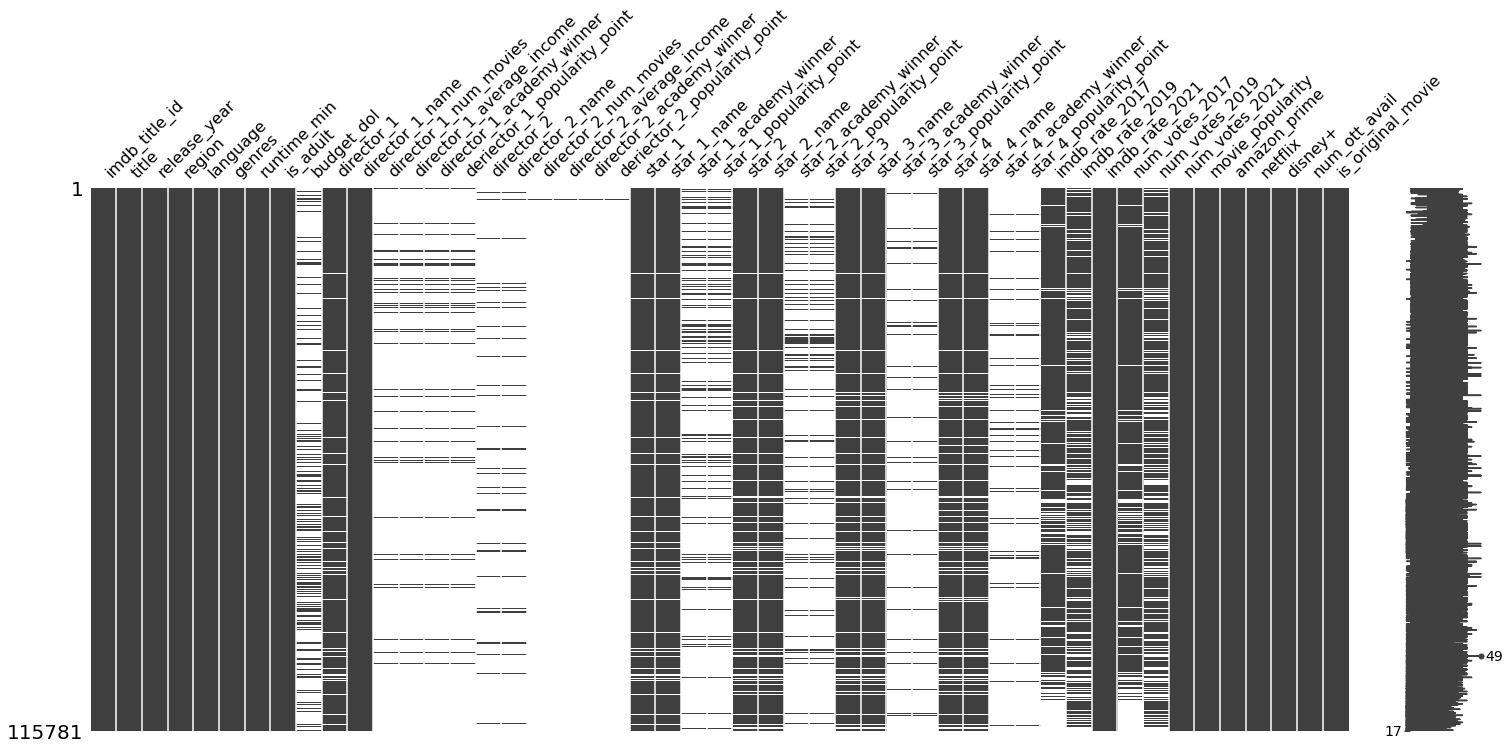

In [163]:
# Final check for the dataset

import missingno as msno
msno.matrix(movie_dataset)
movie_dataset.isnull().sum()

In [164]:
# 1. We will not use the data without information of primary director and star(director_1 ,star_1)
movie_dataset.dropna(subset=['director_1', 'star_1'],inplace=True)
movie_dataset.reset_index(drop=True)

# 2. Make missing value of budget_dol to 0 -> which means unkonw
movie_dataset['budget_dol'].fillna(0, inplace=True)

In [169]:
# 3. Missing value of 2019 imdb rate should be smllaer than imdb_rate_2017
## But missingvalue of 2019 imdb rate of our data is  bigger than imdb_rate_2017.

movie_dataset['imdb_rate_2019'].isnull().sum() - movie_dataset['imdb_rate_2017'].isnull().sum()

6090

In [170]:
# Therefore we should delete some of missing data which will cause the inaccurate results
## We will delete some of the imdb_rate_2017 value whcih is not missing value of imdb_rate_2017 but missing for imdb_rate_2019
### Than fill null value of rate, votes columns to 0 that means data is unkonw

movie_dataset['imdb_rate_2017'][movie_dataset['imdb_rate_2019'].isnull() & movie_dataset['imdb_rate_2017'].notnull()] = 0
movie_dataset['imdb_rate_2017'].fillna(0, inplace=True)
movie_dataset['imdb_rate_2019'].fillna(0, inplace=True)

movie_dataset['num_votes_2017'][movie_dataset['num_votes_2019'].isnull() & movie_dataset['num_votes_2017'].notnull()] = 0
movie_dataset['num_votes_2017'].fillna(0, inplace=True)
movie_dataset['num_votes_2019'].fillna(0, inplace=True)

In [174]:
# Check the total number of 0(missing value)
## We can find that there is more missing value on imdb_rate_2017

sum(movie_dataset['imdb_rate_2019'] == 0) - sum(movie_dataset['imdb_rate_2017'] == 0)

-23508

imdb_title_id                        0
title                                0
release_year                         0
region                               3
language                             0
genres                               0
runtime_min                          0
is_adult                             0
budget_dol                           0
director_1                           0
director_1_name                      0
director_1_num_movies           101070
director_1_average_income       101070
director_1_academy_winner       101070
deriector_1_popularity_point    101070
director_2                      100875
director_2_name                 100875
director_2_num_movies           108193
director_2_average_income       108193
director_2_academy_winner       108193
deriector_2_popularity_point    108193
star_1                               0
star_1_name                         11
star_1_academy_winner            89855
star_1_popularity_point          89855
star_2                   

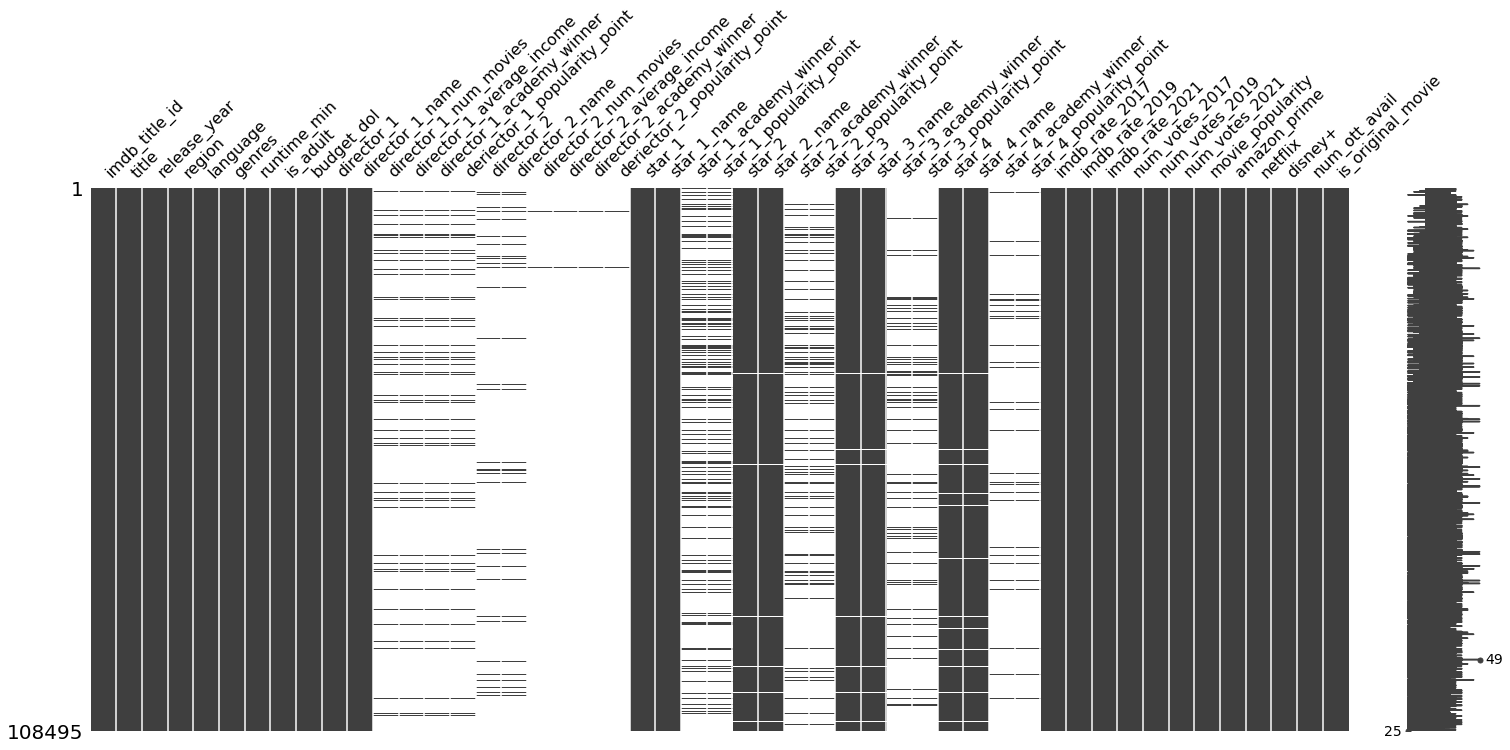

In [175]:
msno.matrix(movie_dataset)
movie_dataset.isnull().sum()

In [ ]:
movie_dataset.to_csv("Fin_dataset/movie_final_data.csv", index=False, encoding='utf-8')
movie_dataset.to_excel("Fin_dataset/movie_final_data.xlsx", index=False, encoding='utf-8')